# Experiment 6 : Mathematical tools used in digital image processing

## Pixel Representation and Colour Models

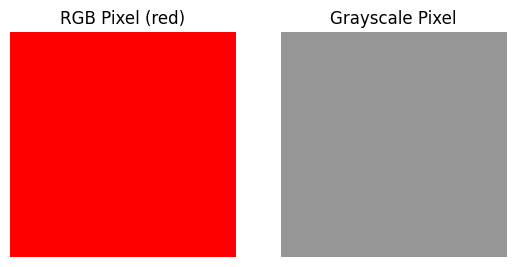

In [12]:
import numpy as np
import matplotlib.pyplot as plt

pixel_rgb = np.array([[255, 0, 0]]) / 255.0  # normalized RGB pixel

pixel_gray = np.array([[150]]) / 255.0  # normalized Grayscale pixel

# Plot RGB pixel
plt.subplot(1, 2, 1)
plt.imshow(pixel_rgb.reshape(1, 1, 3))
plt.title('RGB Pixel (red)')
plt.axis('off')

# Plot grayscale pixel
plt.subplot(1, 2, 2)
plt.imshow(pixel_gray, cmap='gray', vmin=0, vmax=1)
plt.title('Grayscale Pixel')
plt.axis('off')

plt.show()


## Sampling and quantization

/var/folders/1c/mhdn7zln3338hcq5xq1f1g5h0000gn/T/ipykernel_1801/3001374571.py:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_image, basefmt=" ", use_line_collection=True)
/var/folders/1c/mhdn7zln3338hcq5xq1f1g5h0000gn/T/ipykernel_1801/3001374571.py:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(quantized_image, basefmt=" ", use_line_collection=True)


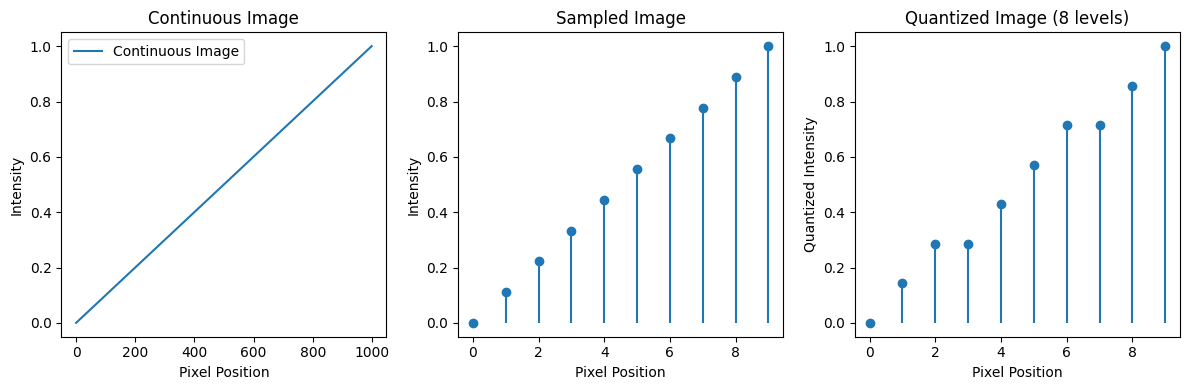

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated continuous grayscale image
continuous_image = np.linspace(0, 1, 1000)  # Creating a continuous intensity gradient

# Sampling the continuous image to form pixels
num_pixels = 10  # Number of pixels in the sampled image
pixel_indices = np.linspace(0, len(continuous_image) - 1, num_pixels).astype(int)
sampled_image = continuous_image[pixel_indices]

# Quantizing the pixel intensities to a finite number of levels (e.g., 8 levels)
num_intensity_levels = 8
quantized_image = np.round(sampled_image * (num_intensity_levels - 1)) / (num_intensity_levels - 1)

# Plot the continuous, sampled, and quantized images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(continuous_image, label='Continuous Image')
plt.title('Continuous Image')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(1, 3, 2)
plt.stem(sampled_image, basefmt=" ", use_line_collection=True)
plt.title('Sampled Image')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')

plt.subplot(1, 3, 3)
plt.stem(quantized_image, basefmt=" ", use_line_collection=True)
plt.title('Quantized Image ({} levels)'.format(num_intensity_levels))
plt.xlabel('Pixel Position')
plt.ylabel('Quantized Intensity')

plt.tight_layout()
plt.show()


Original Image Shape: (256, 256, 3)
Scaled Image Shape: (512, 512, 3)


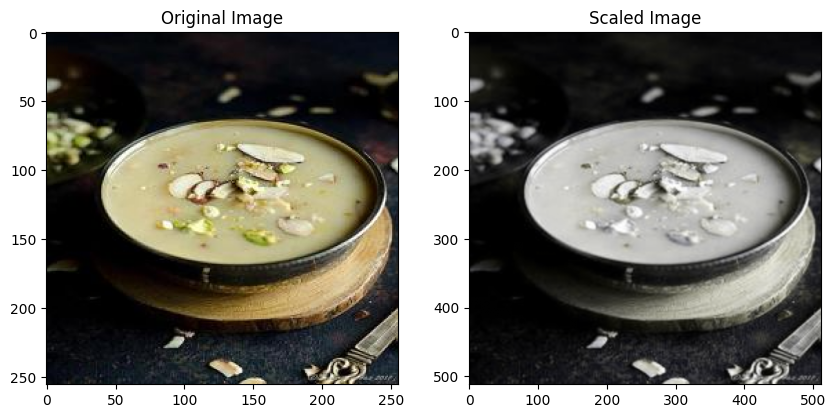

In [28]:
import cv2
from skimage.transform import rescale
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('test2.jpg', cv2.IMREAD_COLOR)
# Convert BGR (OpenCV's default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Example image scaling
scaled_image = rescale(image_rgb, scale=2.0, mode='reflect')
# Ensure the scaled image has 3 color channels (RGB)
scaled_image = scaled_image[:, :, :3]
print(f'Original Image Shape: {image.shape}\nScaled Image Shape: {scaled_image.shape}')

plt.figure(figsize=(10, 5))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
# Scaled image (2x)
plt.subplot(1, 2, 2)
plt.imshow(scaled_image)
plt.title('Scaled Image')
plt.show()


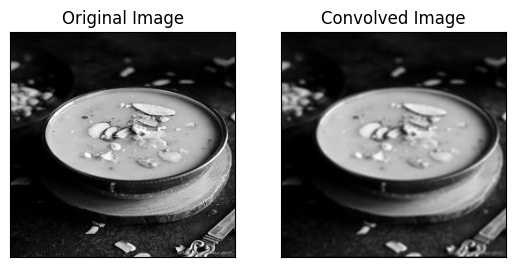

In [32]:
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Create a simple 3x3 kernel
kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

# Apply convolution to an example image
image = cv2.imread('test2.jpg', cv2.IMREAD_GRAYSCALE)
convolved_image = convolve2d(image, kernel, mode='same')

# Display the original and convolved images
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image'), plt.xticks([]), plt.yticks([])

plt.show()


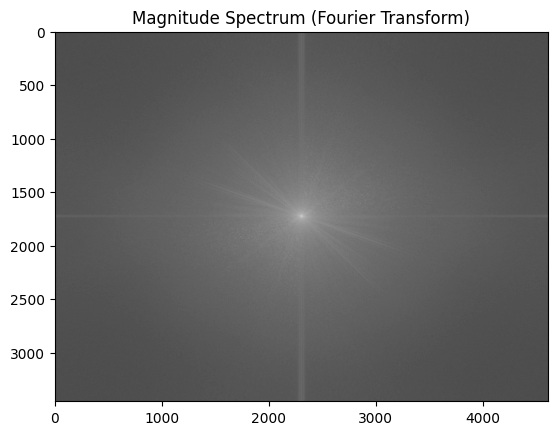

In [36]:
from scipy.fft import fft2, fftshift

image = cv2.imread('flower.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the Fourier Transform
f_transform = fft2(image)
f_transform_shifted = fftshift(f_transform)

# Display the magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.show()


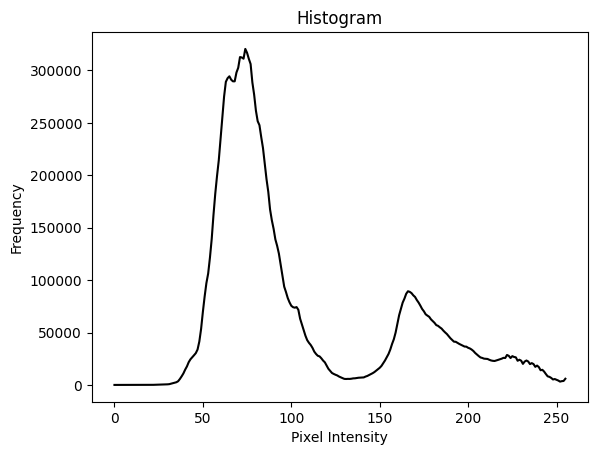

In [39]:
# Load an image
image = cv2.imread('flower.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the histogram
hist, bins = np.histogram(image.flatten(), 256, [0, 256])

# Plot the histogram
plt.plot(hist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


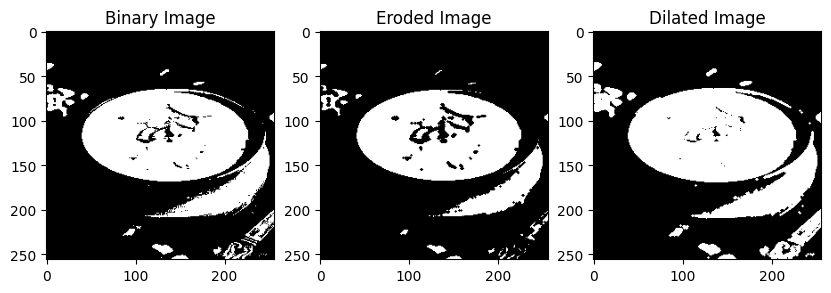

In [44]:
import cv2
import numpy as np
from skimage.morphology import binary_erosion, binary_dilation
import matplotlib.pyplot as plt

image = cv2.imread('test2.jpg', cv2.IMREAD_GRAYSCALE)
# Threshold the image to obtain a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
# Normalize the binary image to have values in {0, 1}
binary_image = binary_image // 255
eroded_image = binary_erosion(binary_image)
dilated_image = binary_dilation(binary_image)
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.show()


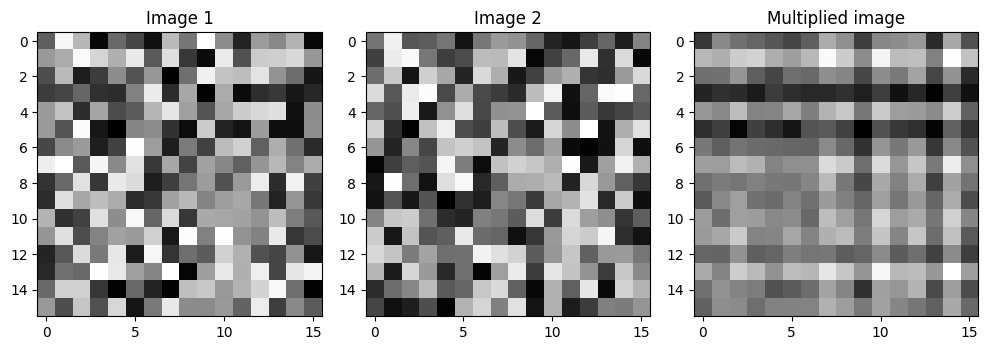

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Create 16x16 matrices
matrix1 = np.random.randint(0, 255, (16, 16))  # Random 16x16 matrix
matrix2 = np.random.randint(0, 255, (16, 16))  # Random 16x16 matrix

# Perform matrix multiplication
result_matrix = np.dot(matrix1, matrix2)

# Plot the images of the matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(matrix1, cmap='gray')
plt.title('Image 1')


plt.subplot(1, 3, 2)
plt.imshow(matrix2, cmap='gray')
plt.title('Image 2')


plt.subplot(1, 3, 3)
plt.imshow(result_matrix, cmap='gray')
plt.title('Multiplied image')


plt.tight_layout()
plt.show()
